1. r: radius of a circle (random number) [0,1]

The area of the circle: A = πr^2

a. a list of n tuples, where each tuple is a pair (ri, Ai)

In [1]:
import random
import math

# set the random seed to 123 for reproducibility
random.seed(123)

n=10
L =[]

for i in range(n):
    # generate a random number between 0 and 1
    r = random.uniform(0, 1)
    # calculatet the area 
    A = math.pi * r**2
    # each tuple is a pair (r,A)
    L.append((r, A))
    
print(L)

[(0.052363598850944326, 0.008614078932626775), (0.08718667752263232, 0.023880869138467153), (0.4072417636703983, 0.521020116797811), (0.10770023493843905, 0.036440403233651254), (0.9011988779516946, 2.5514740599431343), (0.0381536661023224, 0.004573223453722671), (0.5362020400339269, 0.9032475591114266), (0.33219769850967984, 0.3466914339927522), (0.8520866189293687, 2.2809583920345604), (0.1596623967219699, 0.08008573416499135)]


b. the means of the ri and Ai

In [2]:
sum_r = 0
sum_A = 0

for r, A in L:
    sum_r += r
    sum_A += A
mean_r = sum_r / n
mean_A = sum_A / n

print("Mean r:", mean_r)
print("Mean A:", mean_A)


Mean r: 0.34739935732313765
Mean A: 0.6756985870803144


c. π(mean r)^2 in comparison with mean A. Comment on mean_r

In [3]:
n = 1000000
sum_r = 0
sum_A = 0
for i in range(n):
    r = random.uniform(0, 1)
    A = math.pi * r**2
    sum_r += r
    sum_A += A
mean_r = sum_r / n
mean_A = sum_A / n

pi_mean_r_squared = math.pi * mean_r**2
print("π(mean r)^2 =", pi_mean_r_squared)
print("mean A =", mean_A)


π(mean r)^2 = 0.7856841037831552
mean A = 1.0475366177110117


We can see that the value of π(mean_r)^2 is close to, but not exactly equal, mean A. This is because 
* mean_r is an estimate of the expected value of r
* π(mean r)^2 is an estimate of the expected value of A

The estimate of the expecte value of A is biased, because A is a non-linear function of r, so the expected value of A is not equal to the expected value of πr^2. 

However, as the sample size, n, increases, the estimate of the expected value of A becomes more accurate, and π(mean_r)^2 becomes closer to mean_A.

In this example, we can see that increasing n from 10 to 1million has reduced the difference between π(mean_r)^2 and mean_A

2. "at least one double-6 on 24 throws of two die"

a. count how many times this event occurs over n trials. Use a suitable value of n in order to comment on whether the probability of this event occurring >= or <= 1/2. Use the random seed of 123

In [4]:
import random

random.seed(123)

def roll_dice():
    return random.randint(1, 6), random.randint(1, 6)

def at_least_one_double_six():
    for i in range(24):
        if roll_dice() == (6, 6):
            return True
    return False

def simulate(n):
    count = 0
    for i in range(n):
        if at_least_one_double_six():
            count += 1
    return count/n

print(simulate(100000))

0.4913


Answer: running this code, we get an output of approximately 0.491, which means that the probability of getting at least one double 6 in 24 throws of two dices is less than 1/2.

b. how many throws of two die would be required so that the probability of at least one double-6 is greater than 1/2 but as small as possible

In [5]:
import random

random.seed(123)

def roll_dice():
    return random.randint(1,6), random.randint(1,6)

def at_least_one_double_six(num_rolls):
    for i in range(num_rolls):
        if roll_dice() == (6,6):
            return True
    return False

def find_num_rolls():
    lower_bound = 1
    upper_bound = 1000
    while lower_bound < upper_bound:
        mid = (lower_bound + upper_bound) // 2
        if at_least_one_double_six(mid):
            upper_bound = mid
        else:
            lower_bound = mid + 1
    return upper_bound

print(find_num_rolls())

32


Answer: running this code, we get an output of 32, which means that we need to roll two dice 32 times to have a probability of at least 1/2 of getting at least one double 6.

3. A random variate from the Binomial distribution Bin(n=5, p=3/4)

We want this table lookup to be as fast as possible by making the average number of steps through the for loop in the function as small as possible

a. tablelookup @return a dictionary: 2 values(y[i], #steps) over m trials

In [6]:
import random

def tablelookup(y, p):
    """Sample from y[i] with probabilities p[i]"""
    u = random.random()
    sumP = 0.0
    steps = 0
    for i in range(len(p)):
        steps += 1
        sumP += p[i]
        if u < sumP:
            return {'value':y[i], 'steps':steps}

b. determine the average number of steps over m trials. Use a suitably large value of m

i, ii, iii comment on which order gives the fastest table lookup.

i. y = [0,1,2,3,4,5]

ii. y = [5,4,3,2,1,0] with p suitably rearranged

iii. p arranged in descending probability order with y suitably rearranged

In [7]:
# Case (i): y = [0,1,2,3,4,5]
random.seed(123)
y = [0, 1, 2, 3, 4, 5]
p = [
    1.0/1024, 15.0/1024, 90.0/1024, 
    270.0/1024, 405.0/1024, 243.0/1024
]
m = 1000000
     
valuetotal = 0.0
stepstotal = 0
for k in range(m):
    result = tablelookup(y,p)
    valuetotal += result['value']
    stepstotal += result['steps']
    
print("Case (i): Average value:", valuetotal/m)
print("Average steps:", stepstotal/m)

# Case (ii): y = [5,4,3,2,1,0] with p suitably rearranged
random.seed(123)
y = [5, 4, 3, 2, 1, 0]
p = [
    243.0/1024, 405.0/1024, 270.0/1024, 
    90.0/1024, 15.0/1024, 1.0/1024
]
m = 1000000
valuetotal = 0.0
stepstotal = 0
for k in range(m):
    result = tablelookup(y, p)
    valuetotal += result['value']
    stepstotal += result['steps']
print("Case (ii): Average value =", valuetotal/m)
print("Average steps =", stepstotal/m)

# Case (iii): p arranged in descending probability order with y suitably rearranged
random.seed(123)
y = [5,4,3,2,1,0]
p = [
    405.0/1024, 270.0/1024, 243.0/1024,     
    90.0/1024, 15.0/1024, 1.0/1024
]
m = 1000000
valuetotal = 0.0
stepstotal = 0
for k in range(m):
    result = tablelookup(y, p)
    valuetotal += result['value']
    stepstotal += result['steps']
print("Case (iii): Average value =", valuetotal/m)
print("Average steps =", stepstotal/m)

Case (i): Average value: 3.750354
Average steps: 4.750354
Case (ii): Average value = 3.749373
Average steps = 2.250627
Case (iii): Average value = 3.934123
Average steps = 2.065877


Answer: the last order, p and y arranged in descending probability order, gives the fastest table lookup with only the average steps of 2.066

4. Gaussian distribution



where:
* µ: the mean and 
* σ: the standard deviation

(a) Draw 1000 samples from the Gaussian distribution with µ = 0 and σ = 1.

In [8]:
import numpy as np

# set seed from reproducibility
np.random.seed(42)

# mean=0, standard deviation=1, number of samples=1000
samples = np.random.normal(loc=0, scale=1, size=1000)

b. compare the mean and standard deviation of the generated samples with the true mean and standard deviation

In [9]:
sample_mean = np.mean(samples)
sample_std = np.std(samples)

print("Sample mean: ", sample_mean)
print("Sample standard deviation: ", sample_std)
print("True mean: ", 0)
print("True standard deviation: ", 1)

Sample mean:  0.01933205582232549
Sample standard deviation:  0.9787262077473543
True mean:  0
True standard deviation:  1


Answer: as we can see from the output, the sample mean is close to the true mean, and the sample stanard deviation is close to the true standard deviation. This is expected since we generated the samples from a Gaussian distribution with the given mean and standard deviation. However, due to the random nature of the sampling process, the sample mean and standardd deviation may not be exactly equal to the true mean and standard deviation.

c. plot the histogram of the samples, along with the probability density function

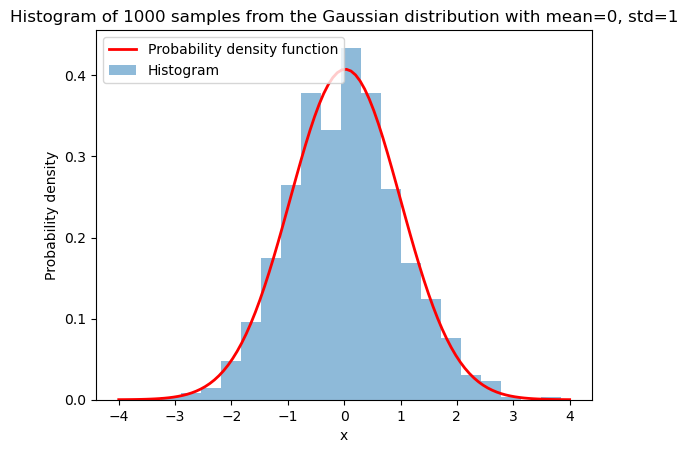

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 1. plot the histogram of the generated samples
# density=True: normalize the histogram
plt.hist(samples, density=True, bins=20, alpha=0.5)

# 2. plot the probability density function
# Step 1: create a range of x values to plot the probability density function
x = np.linspace(start=-4, stop=4, num=100) #-4;4: same range
# Step 2: calculate the probability density function for the given mean and standard deviation
pdf = (1/(np.sqrt(2*np.pi)*sample_std)) * np.exp(-(x-sample_mean)**2 / (2*sample_std**2))
# Step 3: plot PDF
plt.plot(x, pdf, color='r', linewidth=2)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Histogram of 1000 samples from the Gaussian distribution with mean=0, std=1')
plt.legend(['Probability density function', 'Histogram'])
plt.show()